This script is used for the analysis of the experimental results, correlating the results with the proposed activity scoring strategy.

In [31]:
import os
from os.path import join
import pandas as pd
import numpy as np
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

d:\Python\aox\enzyme-mining-aox


In [65]:
DATADIR = os.path.join(CURRENT_DIR, "data", "aox")
RESULTDIR = join(DATADIR, "result")

filenames = {
    "experiment_result": join(RESULTDIR, "experiment_result.tsv"), # the experiment results
    "sequence_picked": join(RESULTDIR, "sequence_picked_results.tsv"), # the picked sequence

    # results
    # "node_new": join(SSN_DIR, "node_new.tsv"),
    # "edge_new": join(SSN_DIR, "edge_new.tsv")
}

In [60]:
# Disambiguation: uniprot and NCBI accession
ncbi_uniprot_map = [
    ['EAA66666.1', 'Q5BFW3'],
    ['AAR89538.1', 'Q9C1S3'],
    ['AAV66468.1', 'Q5S057'],
    ['AAV66467.2', 'Q5S058'],
    ['AAF82788.1', 'Q9P304'],
    ['XP_001838223.2', 'A8P219'],
    ['XP_007868339.1', 'S7RFS3'], # A8DPS4
    ['A8DPS4', 'S7RFS3'],
    ['CAM84030.1', 'A6PZG7'],
    ['CAM84031.1', 'A6PZG8'],
    ['CAM84032.1', 'A6PZG9'],
    ['AAB57849.1', 'F2QY27'],
    ['AAB57850.1', 'F2R038'],
    ['AFO55203.1', 'I7CMK2'],
    ['AHC95541.1', 'A0A067YIW8'],
    ['AAL56054.1', 'Q8X1N1'],
    ['UXW61383.1', 'A0A977TIR6'],
    ['AAF02495.1', 'Q9UVU1'],
    ['AAF02494.1', 'Q9UVU2'],
    ['AAQ99151.1', 'Q6TAW1'],
    ['AAV66465.1', 'Q5S060'],
    ['AAV66466.1', 'Q5S059'],
    ['CDG66232.1', 'T2M2J4']
]
ncbi_uniprot_map = {
    k:v for k,v in ncbi_uniprot_map
}

In [71]:
sequence_picked_id = pd.read_csv(filenames['sequence_picked'], sep='\t')['sequence_id'].to_list()
sequence_picked_id = set(ncbi_uniprot_map.get(i, i) for i in sequence_picked_id)
print(len(sequence_picked_id)) # 357

357


In [90]:
experiment_result = pd.read_csv(filenames['experiment_result'], sep='\t')
experiment_result['r_name'] = experiment_result['name'].apply(lambda x: ncbi_uniprot_map.get(x, x))
experiment_result['picked'] = experiment_result['r_name'].apply(lambda x: x in sequence_picked_id)
experiment_result = experiment_result.sort_values(by=['round', 'activity(U/mg)', 'Yield (mg/L)', 'picked', 'r_name'], ascending=[True, False, False, False, True]).reset_index(drop=True)
# S7RFS3 # A8DPS4
# A0A642VDA0 # unique
experiment_result

,#id,name,round,inclusion,activity(U/mg),SD,Yield (mg/L),r_name,picked
0,24,A8DPS4,1,0,1432.4,102.0,184,S7RFS3,True
1,23,A0A642VDA0,1,0,241.9,10.9,40,A0A642VDA0,False
2,26,G8ZNE6,1,0,0.0,0.0,148,G8ZNE6,False
3,31,Q7X2H8,1,0,0.0,0.0,112,Q7X2H8,False
4,29,Q00922,1,0,0.0,0.0,76,Q00922,False
5,30,Q6CEP8,1,0,0.0,0.0,53,Q6CEP8,False
6,28,P56216,1,0,0.0,0.0,35,P56216,False
7,22,A0A1E3PW31,1,0,0.0,0.0,31,A0A1E3PW31,False
8,20,A0A067YIW8,1,1,0.0,0.0,0,A0A067YIW8,True
9,25,C4R702,1,1,0.0,0.0,0,C4R702,True


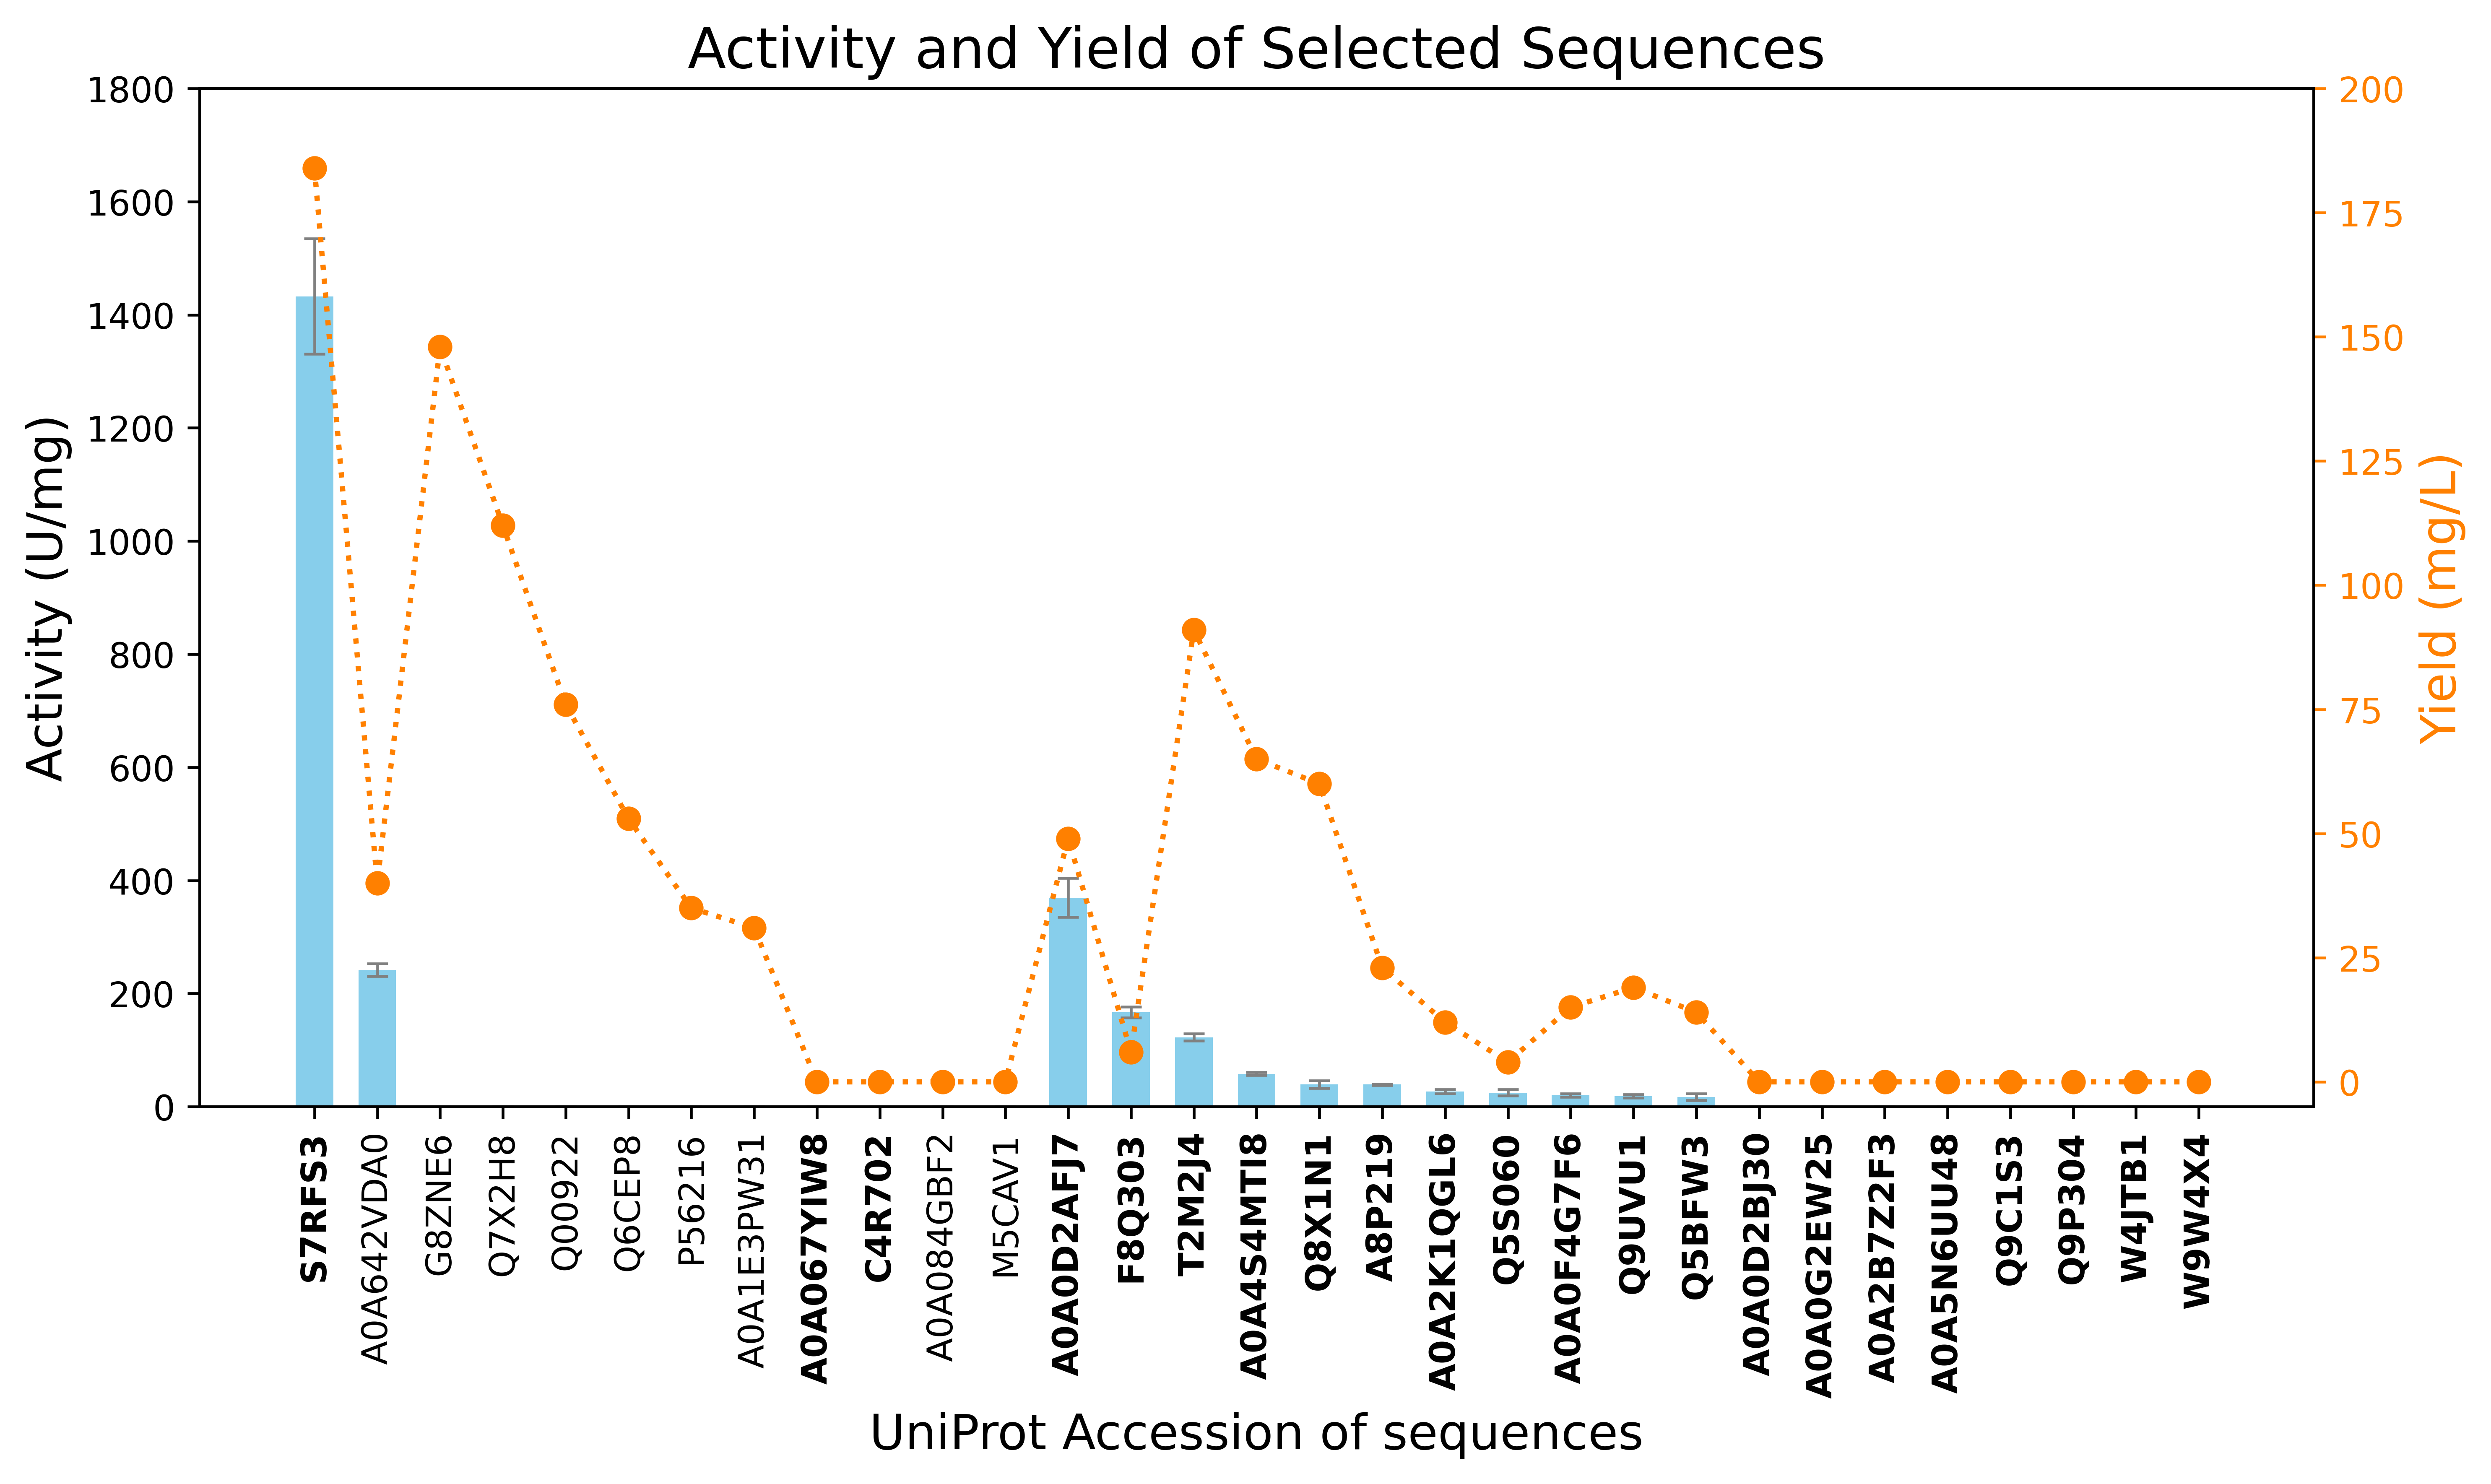

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6), dpi=600)

ax1.bar(
    experiment_result['r_name'], 
    experiment_result['activity(U/mg)'], 
    width=0.6, 
    label='Activity (U/mg)', 
    color='skyblue', 
    yerr=experiment_result['SD'], 
    error_kw={
        'elinewidth': 0.8, 
        'ecolor': 'gray', 
        'capsize': 3, 
        'capthick': 0.8
    }
)
ax1.set_xlabel("UniProt Accession of sequences", fontsize=14)
ax1.set_ylabel("Activity (U/mg)", fontsize=14)
ax1.set_ylim((0,1800))
ax1.set_title("Activity and Yield of Selected Sequences", fontsize=16)
ax1.tick_params(axis='x', rotation=90)
for label, bl_picked in zip(ax1.get_xticklabels(), experiment_result['picked']):
    label.set_ha('right')
    label.set_va('center')
    label.set_rotation_mode('anchor')
    if bl_picked:
        label.set_fontweight('bold')

ax2 = ax1.twinx()
ax2.plot(experiment_result['r_name'], experiment_result['Yield (mg/L)'], linestyle='dotted', marker='o', color='#FF8000', label='Yield (mg/L)')
ax2.set_ylabel("Yield (mg/L)", fontsize=14, color='#FF8000')
ax2.set_ylim((-5,200))
ax2.tick_params(axis='y', colors='#FF8000')

plt.tight_layout()
plt.show()